<a href="https://colab.research.google.com/github/Anipro-10/Random-Walk-Simulation/blob/main/Biased_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
import random

In [ ]:
init_pos = (0,0)
nsteps = 1000

In [ ]:
def walk(init_pos, nsteps):
  positions = []
  distances = []
  probabilities = [0.15, 0.2, 0.1, 0.55]
  positions.append(init_pos)
  for i in range(1,nsteps+1):
    movement = np.random.choice(['right', 'left', 'down', 'up'],p=probabilities)
    if movement == 'up':
      new_pos = (positions[i-1][0], positions[i-1][1]+1)
    if movement == 'down':
      new_pos = (positions[i-1][0], positions[i-1][1]-1)
    if movement == 'left':
      new_pos = (positions[i-1][0]-1, positions[i-1][1])
    if movement == 'right':
      new_pos = (positions[i-1][0]+1, positions[i-1][1])
    positions.append(new_pos)
    distance = np.linalg.norm(np.array(new_pos)-np.array((0,0)))
    distances.append(distance)

  return positions, distances


In [ ]:
positions, displacements = walk(init_pos, nsteps)

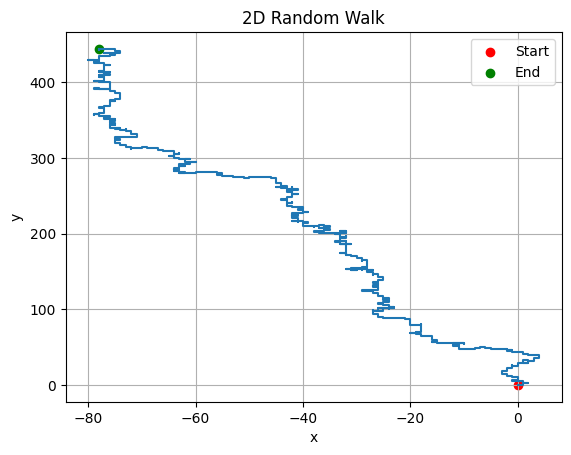

In [ ]:
x_pos_history = []
y_pos_history = []
for i in range(len(positions)):
  x_pos_history.append(positions[i][0])
  y_pos_history.append(positions[i][1])

plt.scatter(x_pos_history[0], y_pos_history[0], color='red', label='Start')
plt.scatter(x_pos_history[-1], y_pos_history[-1], color='green', label='End')
plt.plot(x_pos_history, y_pos_history)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Random Walk")
plt.legend()
plt.grid(True)
plt.show()

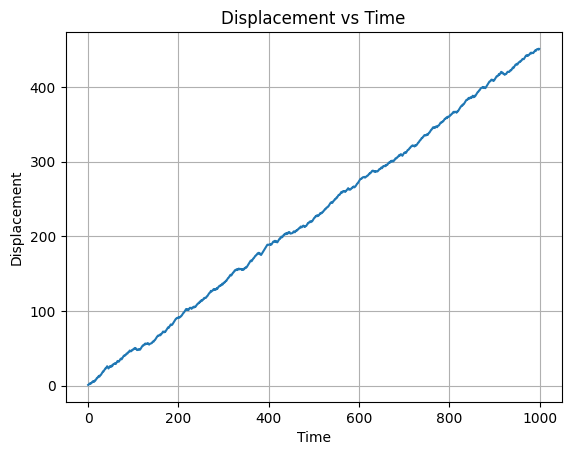

In [ ]:
plt.plot(displacements)
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.title("Displacement vs Time")
plt.grid(True)
plt.show()


In [ ]:
displacements = np.array(displacements)
msd = np.cumsum(displacements**2)/np.arange(1,nsteps+1)

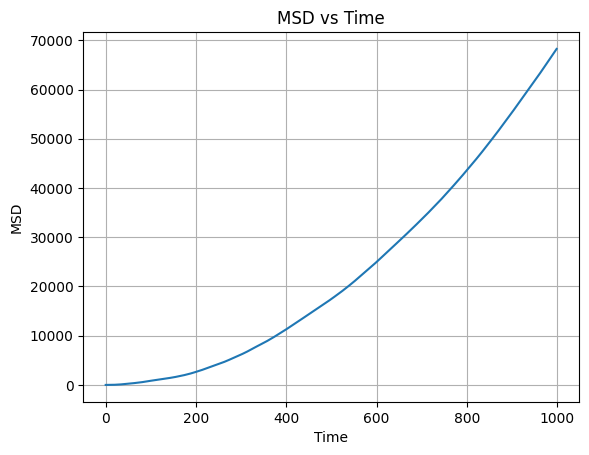

In [ ]:
plt.plot(msd)
plt.xlabel("Time")
plt.ylabel("MSD")
plt.title("MSD vs Time")
plt.grid(True)
plt.show()


In [ ]:
ntrials = 1000
njumps = 100

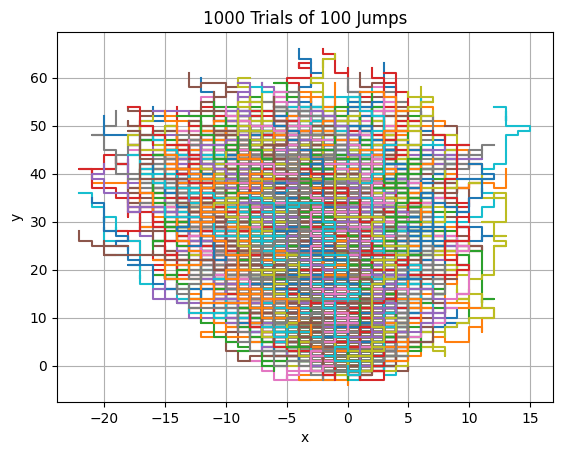

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

trajectories = []
displacements_array = []
msd_array = []
for _ in range(ntrials):
  positions, displacements = walk(init_pos, njumps)
  displacements_array.append(displacements)
  trajectories.append(positions)
  displacements = np.array(displacements)
  msd = np.cumsum(displacements**2)/np.arange(1,njumps+1)
  msd_array.append(msd)

for trajectory in trajectories:
  x_pos_history = [pos[0] for pos in trajectory]
  y_pos_history = [pos[1] for pos in trajectory]
  plt.plot(x_pos_history, y_pos_history)

plt.xlabel("x")
plt.ylabel("y")
plt.title(f'{ntrials} Trials of {njumps} Jumps')
plt.grid(True)
plt.show()


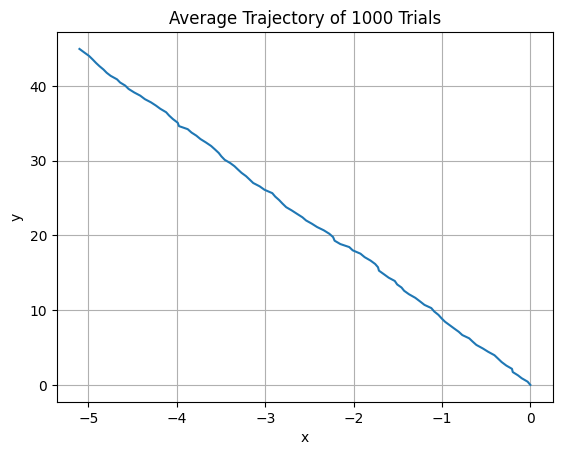

In [ ]:

avg_x = [0] * (njumps+1)
avg_y = [0] * (njumps+1)
for trajectory in trajectories:
  for i in range(len(trajectory)):
    avg_x[i] += trajectory[i][0]
    avg_y[i] += trajectory[i][1]

for i in range(len(avg_x)):
  avg_x[i] /= len(trajectories)
  avg_y[i] /= len(trajectories)

plt.plot(avg_x, avg_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Average Trajectory of {ntrials} Trials")
plt.grid(True)
plt.show()


In [ ]:
avg_displacements  = np.mean(displacements_array, axis = 0)
avg_msd = np.mean(msd_array, axis = 0)

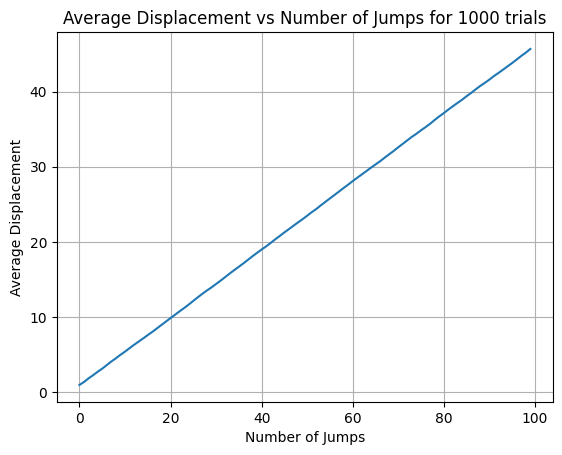

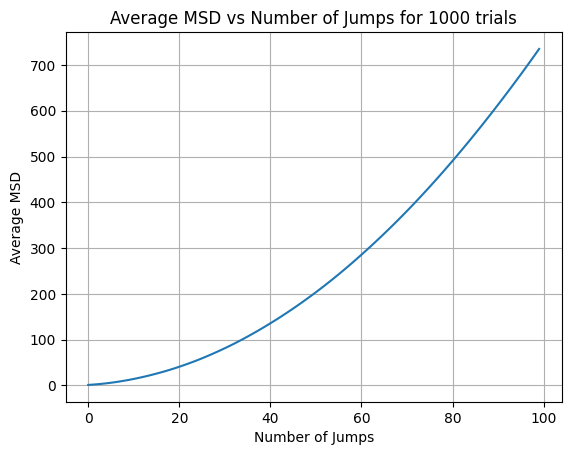

In [ ]:

plt.plot(avg_displacements)
plt.xlabel("Number of Jumps")
plt.ylabel("Average Displacement")
plt.title(f"Average Displacement vs Number of Jumps for {ntrials} trials")
plt.grid(True)
plt.show()

plt.plot(avg_msd)
plt.xlabel("Number of Jumps")
plt.ylabel("Average MSD")
plt.title(f"Average MSD vs Number of Jumps for {ntrials} trials")
plt.grid(True)
plt.show()
